In [83]:
!date

Fri Dec  6 09:34:30 PST 2019


# Time and speed

In [172]:
import pandas as pd
import glob
import collections
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [85]:
cellranger = "/home/sina/projects/kite/5k_pbmc_protein_v3/benchmark/"
cell_hashing = "/home/sina/projects/kite/cell-hashing/benchmark/"
clicktag = "/home/sina/projects/kite/clicktag/benchmark/"
perturb = "/home/sina/projects/kite/perturb-seq/benchmark/"
multi = "/home/sina/projects/kite/multi-seq/benchmark/"
cite = "/home/sina/projects/kite/cite-seq/benchmark/"

folders = [cellranger, cell_hashing, clicktag, perturb, multi, cite]

In [86]:
glob.glob(cite+"*")[0].split('/')[-1].split('.')[0]

'bm_cite_seq'

In [87]:
header_line = ["assay", "program", 's','h:m:s','max_rss','max_vms','max_uss','max_pss','io_in','io_out','mean_load']

In [88]:
d = collections.defaultdict(dict)
df = pd.DataFrame(columns=header_line)

In [89]:
idx=0
for folder in folders:
    fname = folder.split('/')[-3]
    
    for file in glob.glob(folder + "*"):
        with open(file) as f:
            header_line = next(f).strip().split("\t")
            tech = file.split('/')[-1].split('.')[0]
            program = "_".join(tech.split('_')[1:])
            #d[fname][tech] = 
            df.loc[idx] = [fname, program] + f.readline().strip().split('\t')
            idx += 1
            

In [90]:
df["assay"].unique()

array(['5k_pbmc_protein_v3', 'cell-hashing', 'clicktag', 'perturb-seq',
       'multi-seq', 'cite-seq'], dtype=object)

In [101]:
df

,assay,program,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
0,5k_pbmc_protein_v3,kb_count,281.0782,0:04:41,4166.73,6713.17,4143.50,4148.22,0.22,7619.83,0.00
1,5k_pbmc_protein_v3,cellranger,2451.2302,0:40:51,28639.26,40157.13,28462.83,28483.27,0.58,32184.92,0.00
2,5k_pbmc_protein_v3,kb_ref,0.6843,0:00:00,71.01,2598.87,48.36,52.99,0.00,0.25,0.00
3,cell-hashing,cite_seq,3728.1230,1:02:08,35354.87,251747.09,23784.61,23911.44,0.01,33.56,0.00
4,cell-hashing,kb_count,323.9293,0:05:23,622.50,6779.94,599.72,605.49,0.07,5820.97,0.00
5,cell-hashing,kb_ref,0.8371,0:00:00,55.75,2960.45,41.58,43.79,0.00,0.00,0.00
6,clicktag,cite_seq,1091.3603,0:18:11,23286.92,239054.77,11611.47,11737.38,0.00,13.47,0.00
7,clicktag,kb_count,101.2880,0:01:41,217.16,3319.29,194.17,198.92,0.04,1869.70,0.00
8,clicktag,kb_ref,0.8177,0:00:00,55.49,2960.07,41.21,43.86,0.00,0.00,0.00
9,perturb-seq,kb_count,1768.9437,0:29:28,184.96,3309.99,161.76,166.50,22005.12,0.65,0.00


In [178]:
kb_count = df[df["program"] == "kb_count"]
#df[df["program"] == "cellranger"].append(pd.Series([0]*len(df.columns), index=df.columns), ignore_index=True)

In [193]:
cite_seq = df[df["program"] == "cite_seq"]
cite_seq["s"] = cite_seq["s"].astype(float)

/home/sina/tools/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
kb_count_cmp = kb_count[(kb_count["assay"] != "perturb-seq") & (kb_count["assay"] != "5k_pbmc_protein_v3")]
kb_count_cmp

,assay,program,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
4,cell-hashing,kb_count,323.9293,0:05:23,622.50,6779.94,599.72,605.49,0.07,5820.97,0.00
7,clicktag,kb_count,101.2880,0:01:41,217.16,3319.29,194.17,198.92,0.04,1869.70,0.00
12,multi-seq,kb_count,385.4347,0:06:25,760.53,6794.86,735.70,740.90,0.21,4328.81,0.00
15,cite-seq,kb_count,414.1797,0:06:54,186.67,3307.27,163.85,167.88,0.01,83.21,0.00


In [195]:
kb_count_cmp["s"] = kb_count_cmp["s"].astype(float)

/home/sina/tools/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
cite_seq = cite_seq.sort_values("s")

In [197]:
cite_seq = cite_seq.set_index("assay")
kb_count_cmp = kb_count_cmp.set_index("assay")

In [198]:
kb_count_cmp = kb_count_cmp.reindex(cite_seq.index)

In [ ]:
kb_count_solo = kb_count[(kb_count["assay"] == "perturb-seq") | (kb_count["assay"] == "5k_pbmc_protein_v3")]

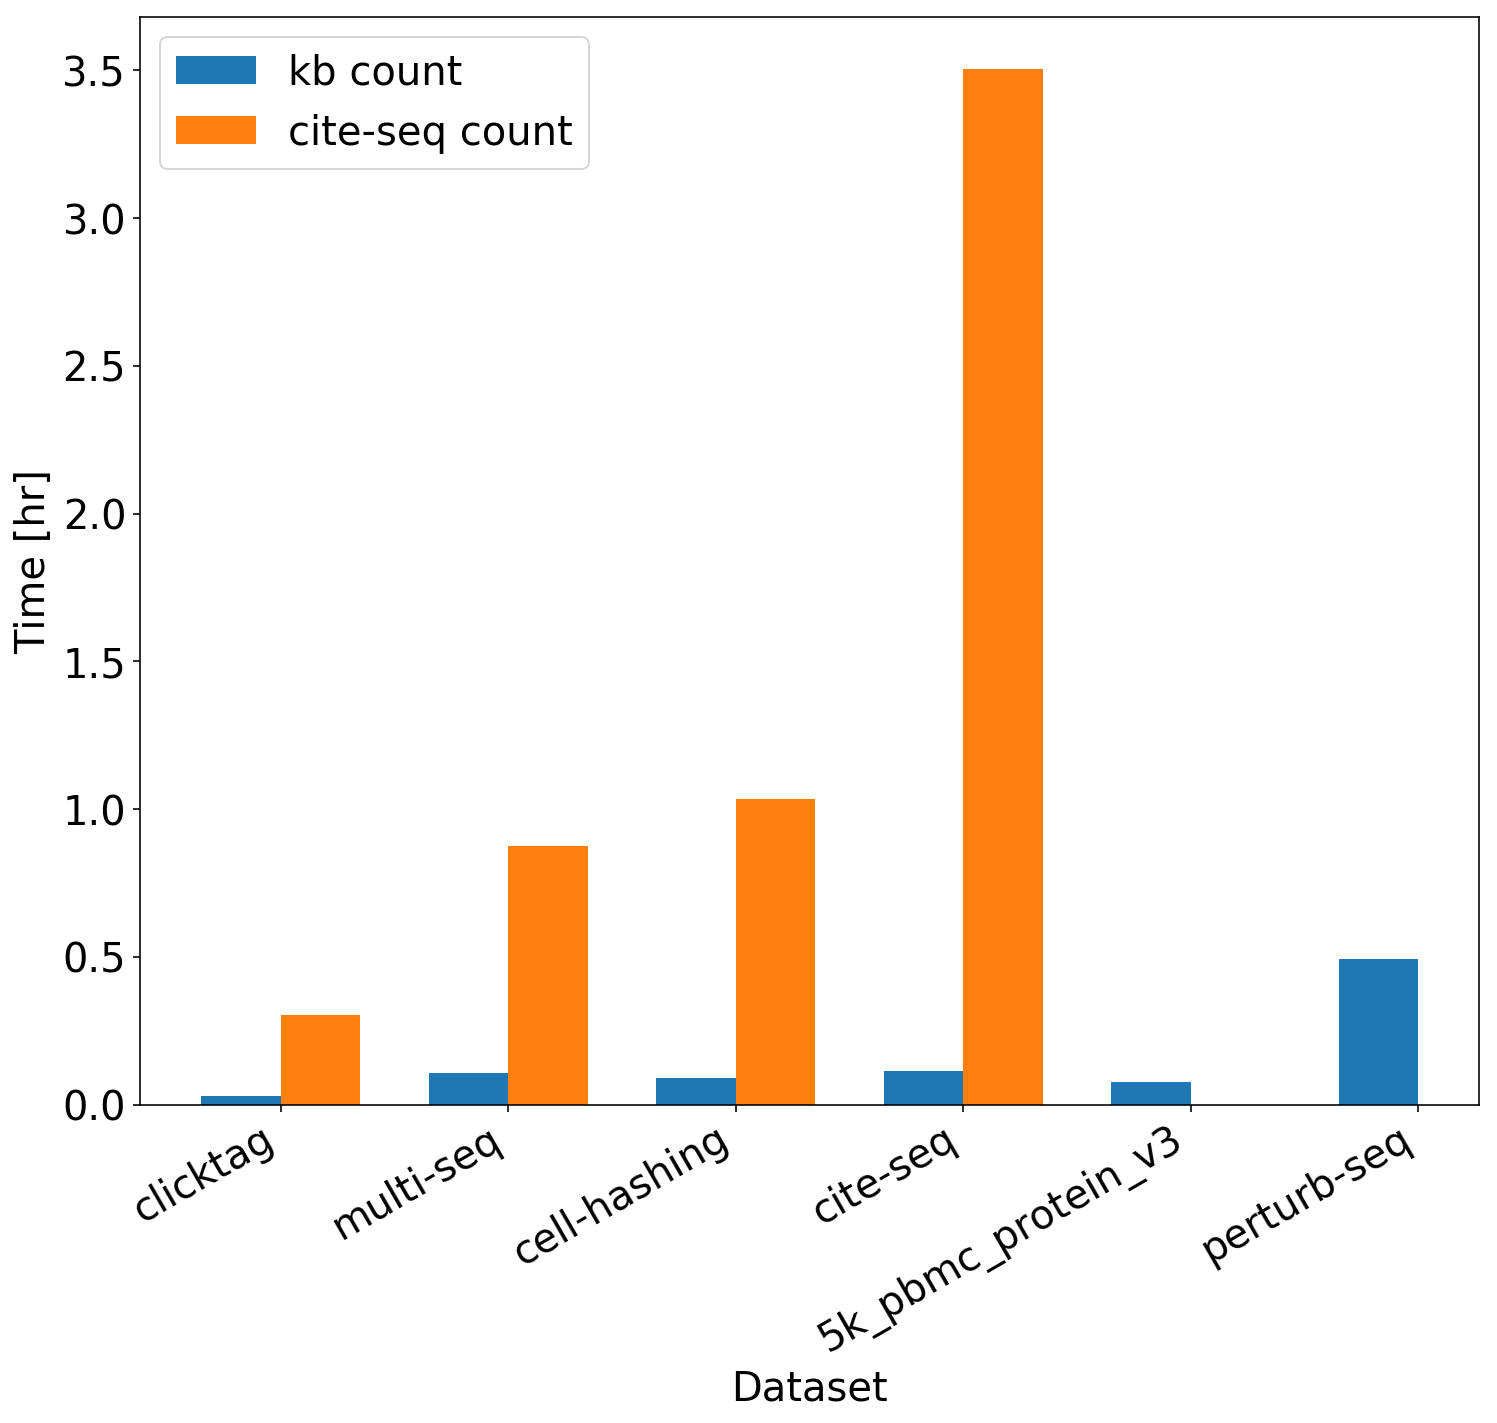

In [232]:
N = 4


fig, ax = plt.subplots(figsize=(12,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

vals = np.append(kb_count_cmp["s"].values.astype(float)/60/60, kb_count_solo["s"].values.astype(float)/60/60)

p1 = ax.bar(np.arange(N+2), vals, width, label="kb count")


p2 = ax.bar(ind + width, cite_seq["s"].values.astype(float)/60/60, width, label="cite-seq count")

ax.set_xticks(np.arange(N+2) + width / 2)
ax.set_xticklabels(np.append(kb_count_cmp.index.values, kb_count_solo.assay.values))
plt.xticks(rotation=30, ha="right")


ax.legend((p1[0], p2[0]), ('kb count', 'cite-seq count'))
ax.set_ylabel("Time [hr]")
ax.set_xlabel("Dataset")

ax.set_ylim(bottom=0)
plt.show()

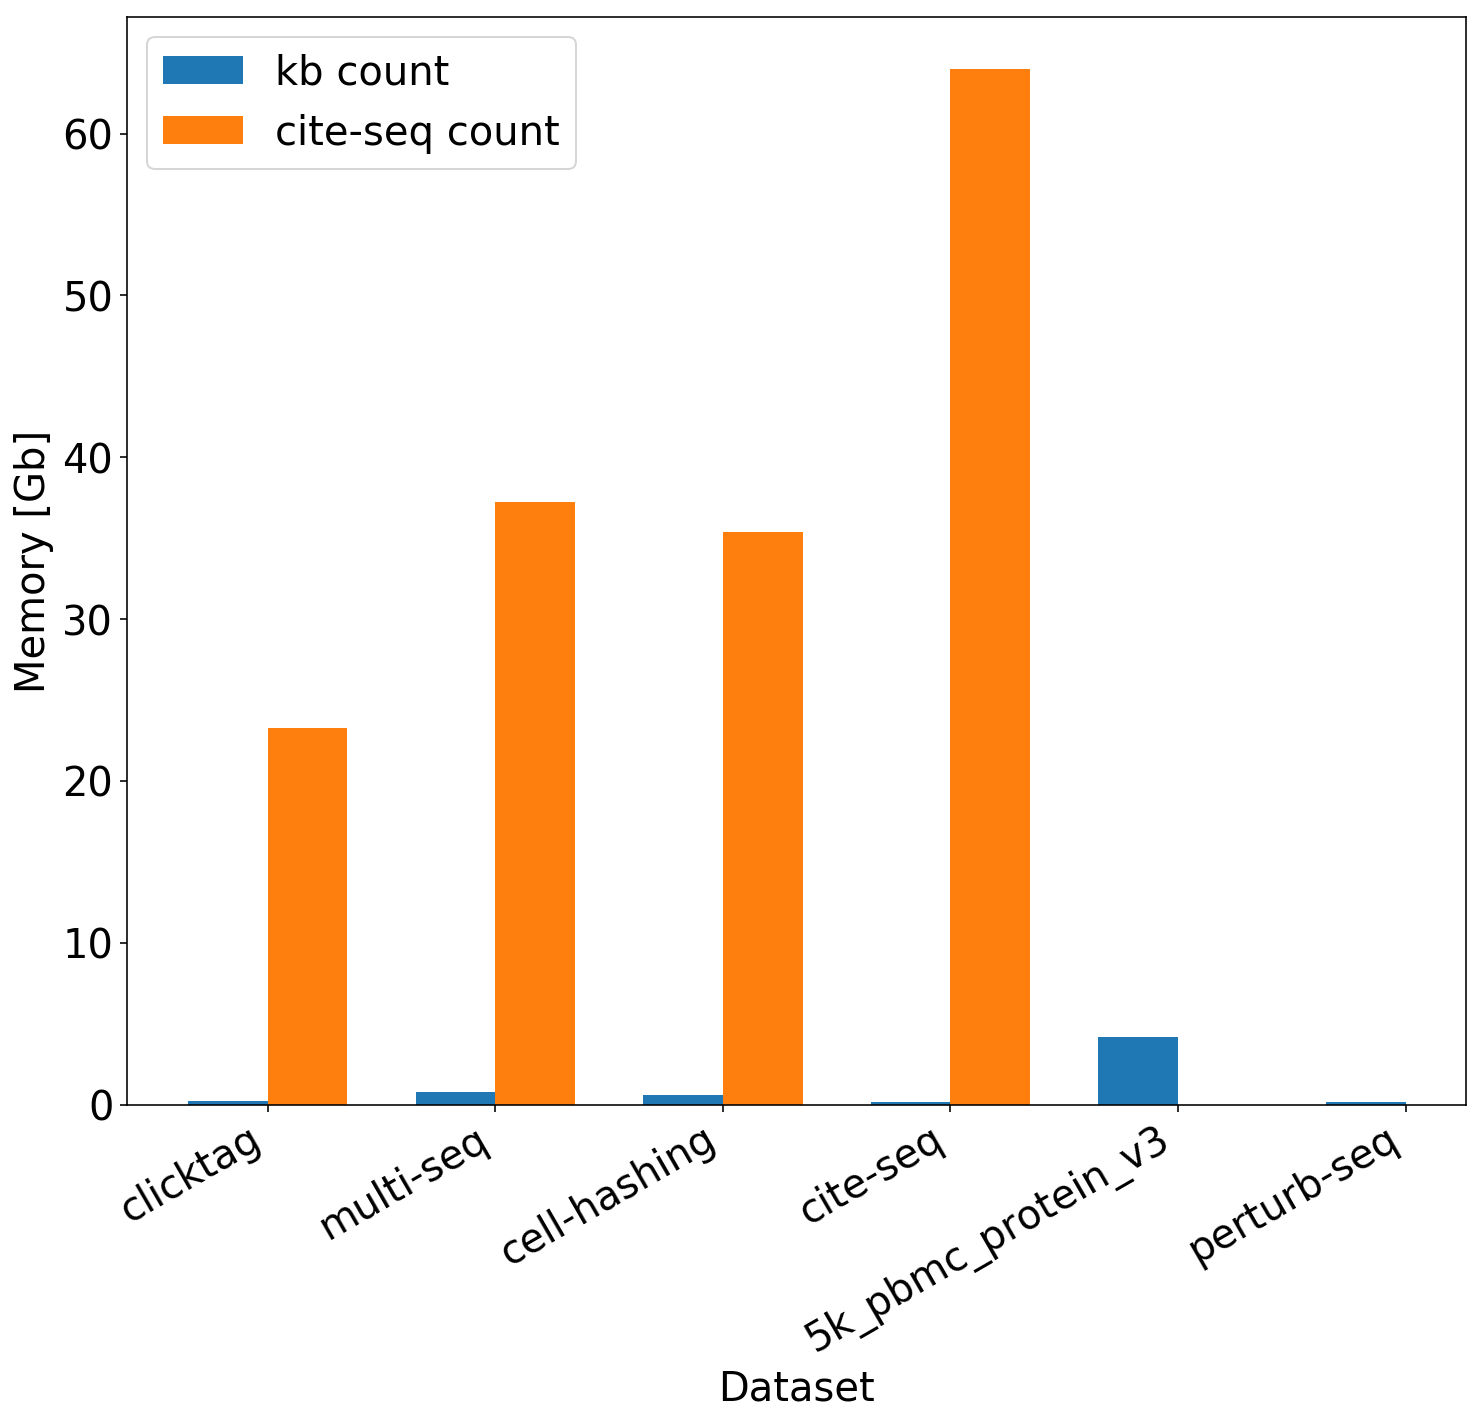

In [233]:
N = 4


fig, ax = plt.subplots(figsize=(12,10))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

vals = np.append(kb_count_cmp["max_rss"].values.astype(float)/1000, kb_count_solo["max_rss"].values.astype(float)/1000)

p1 = ax.bar(np.arange(N+2), vals, width, label="kb count")


p2 = ax.bar(ind + width, cite_seq["max_rss"].values.astype(float)/1000, width, label="cite-seq count")

ax.set_xticks(np.arange(N+2) + width / 2)
ax.set_xticklabels(np.append(kb_count_cmp.index.values, kb_count_solo.assay.values))
plt.xticks(rotation=30, ha="right")


ax.legend((p1[0], p2[0]), ('kb count', 'cite-seq count'))
ax.set_ylabel("Memory [Gb]")
ax.set_xlabel("Dataset")

ax.set_ylim(bottom=0)
plt.show()